Библиотеки:

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd            
import seaborn as sns           
import sklearn 

Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

Загружаем датасет

In [3]:
data_raw = pd.read_csv('water_potability.csv')

Размер таблицы

In [4]:
data_raw.shape

(3276, 10)

Выведем первые 7 элементов таблицы

In [5]:
data_raw.head(7)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0


In [6]:
data_raw['Potability'] = data_raw['Potability'].astype('category')

# Визуализация и описательная статистика

In [7]:
data_raw.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


Видим, что для разных столбцов количество элементов отличается. из этого следует, что есть пропущенные элементы. 
Построим такие же таблицы для значений Potability = 1 и Potability = 0

In [8]:
data_raw[data_raw['Potability'] == 1].describe()  

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


In [9]:
data_raw[data_raw['Potability'] == 0].describe()  

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000


Видим, что значения для таблиц похожи. Есть небольшие отличия в столбце Solids

# Работа с пропущенными значениями

In [10]:
data_raw.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

У нас есть пропущенные значения в столбцах ph, sulfate, Trihalomethanes. Тогда заменим их средними значеиями

In [11]:
data_raw['ph'] = data_raw['ph'].fillna(data_raw['ph'].mean())
data_raw['Sulfate'] = data_raw['Sulfate'].fillna(data_raw['Sulfate'].mean())
data_raw['Trihalomethanes'] = data_raw['Trihalomethanes'].fillna(data_raw['Trihalomethanes'].mean())

In [12]:
data_raw.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Построим поточечные графики разброса для всех параметров относильно Potability

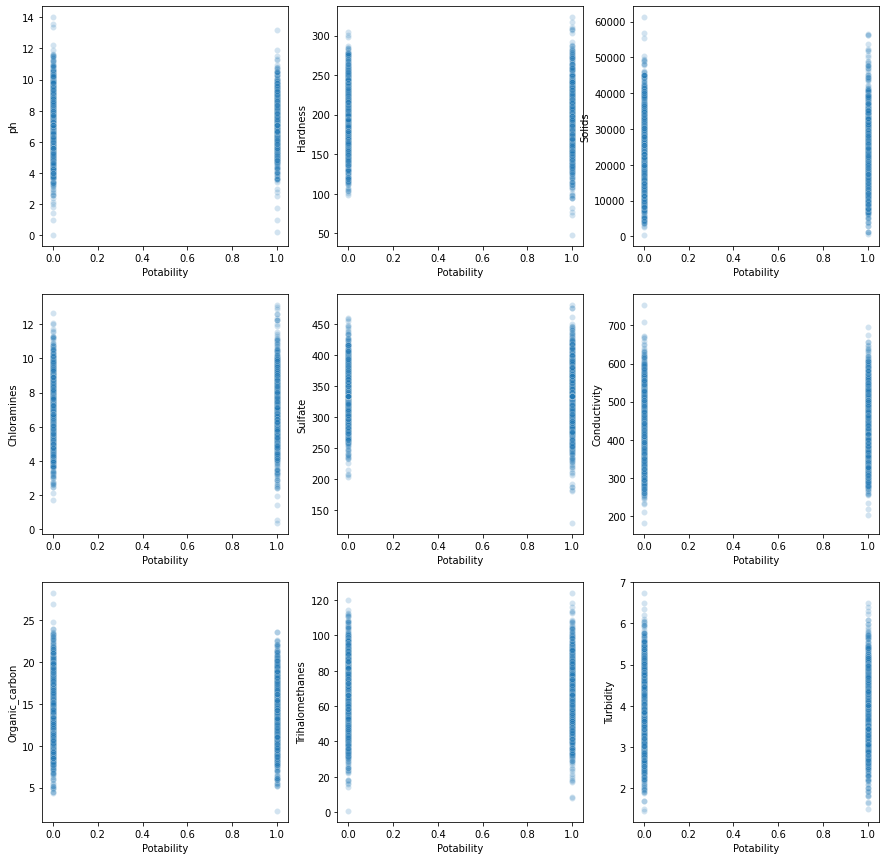

In [13]:
fig, ax = plt.subplots(3,3, figsize = (15, 15))
ax=ax.flatten()
for i, attr in enumerate(data_raw.columns.values):
    if attr != 'Potability':
        sns.scatterplot(x = 'Potability', y = attr, data = data_raw, ax = ax[i], alpha = 0.2)

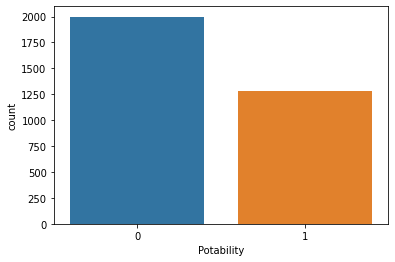

In [14]:
sns.countplot(x = 'Potability', data = data_raw)
pass

Для всех параметров строим boxblots

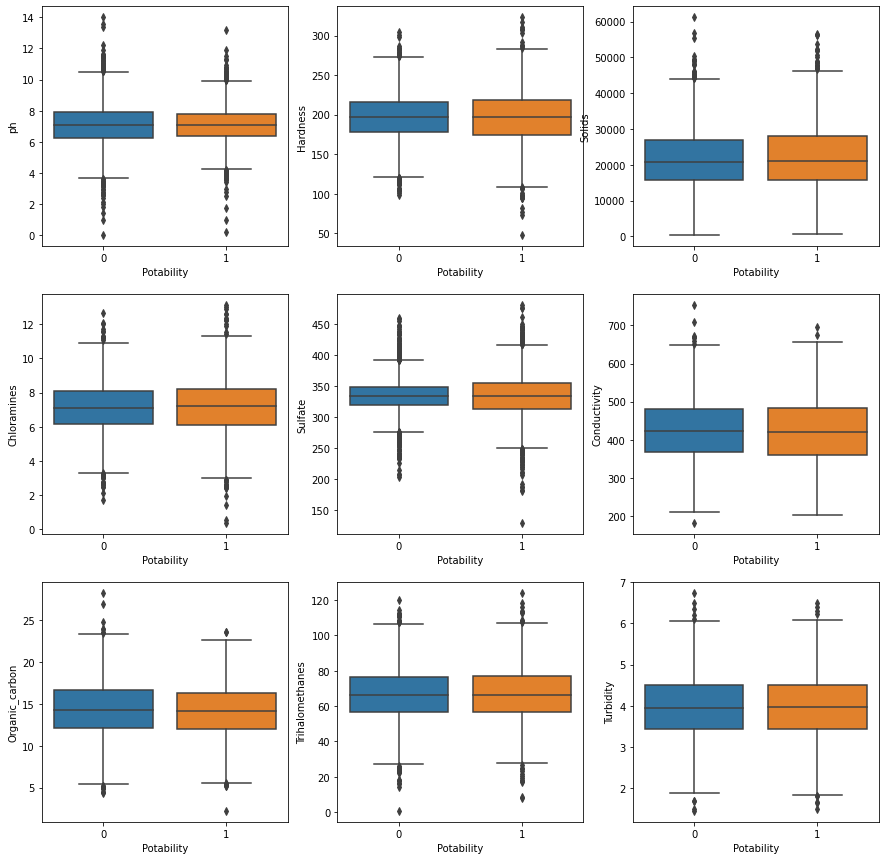

In [15]:
fig, ax = plt.subplots(3,3, figsize = (15, 15))
ax=ax.flatten()
for i, attr in enumerate(data_raw.columns.values):
    if attr != 'Potability':
        sns.boxplot(x = 'Potability', y = attr, data = data_raw, ax = ax[i])
    

Матрицу корреляции

In [16]:
corr_mat = data_raw.corr()
corr_mat

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000


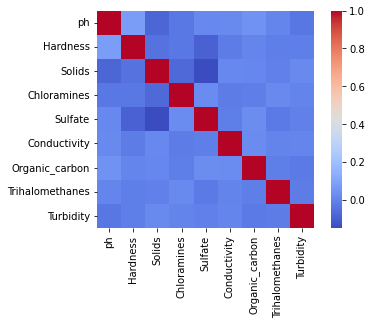

In [17]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

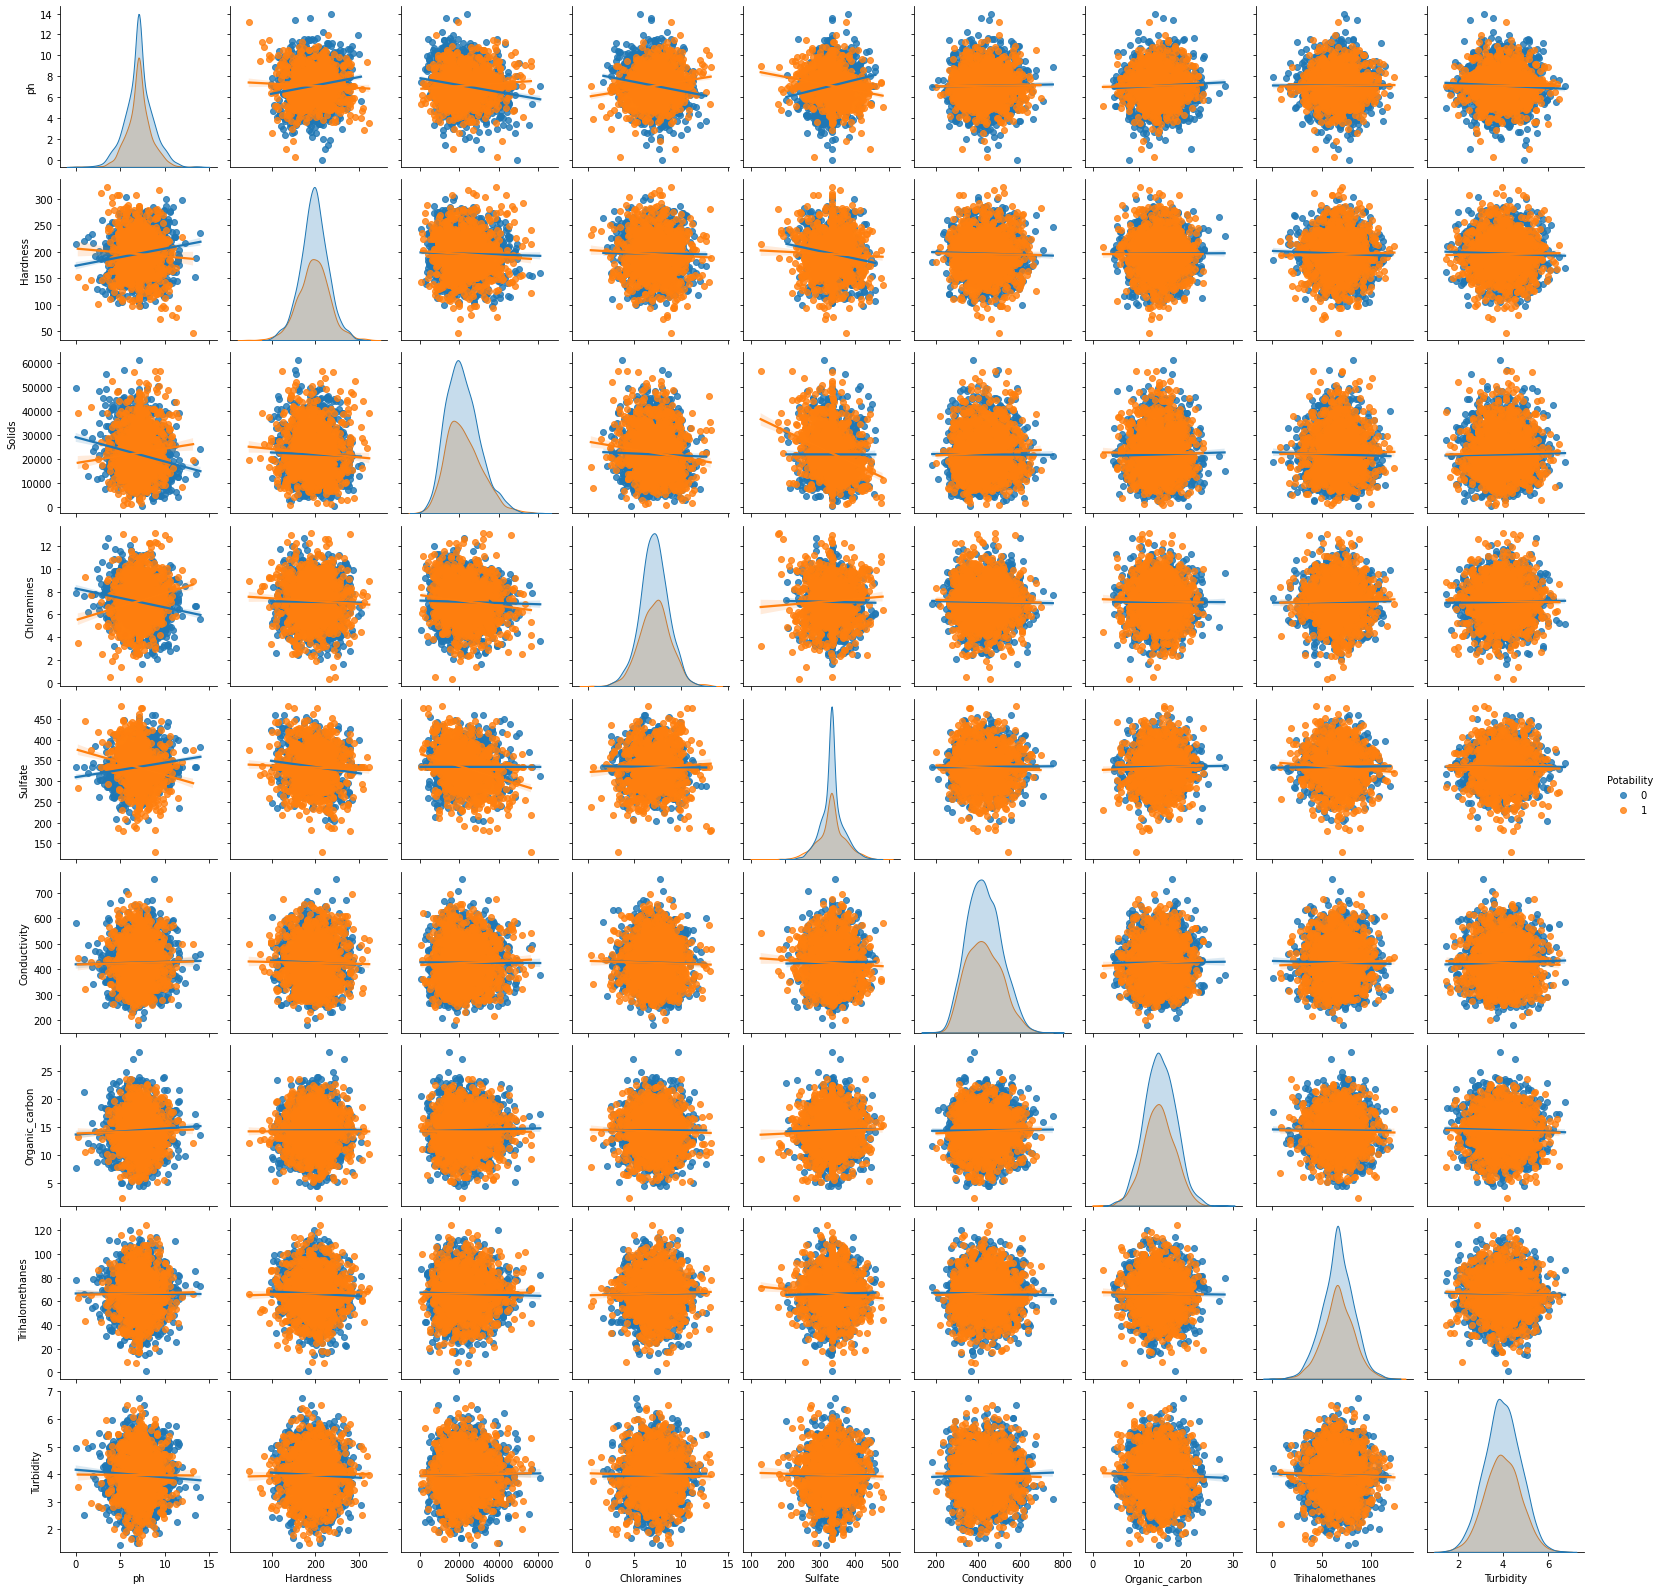

In [18]:
sns.pairplot(data_raw, hue='Potability', kind='reg')
pass

Корреляция между параметрами небольшая, нет явной линейной зависимости. Можно предположить, что в данном нелинейные методы будут показывать лучший результат.

# Нормализация количественных признаков

In [19]:
df = X = data_raw.drop(['Potability'], axis=1)
data_stand = (df.astype(float) - df.mean(axis = 0))/data_raw.std(axis = 0)

In [20]:
data_stand.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,-4.674052e-16,1.025906e-15,-4.554761e-17,5.205441e-16,1.591997e-15,1.756836e-16,1.735147e-17,1.713458e-16,5.552471e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.817011e+00,-4.529762e+00,-2.473966e+00,-4.276635e+00,-5.665771e+00,-3.027828e+00,-3.653077e+00,-4.163525e+00,-3.225068e+00
25%,-5.463578e-01,-5.936466e-01,-7.238810e-01,-6.284287e-01,-4.615366e-01,-7.481769e-01,-6.708163e-01,-6.181808e-01,-6.754064e-01
50%,-6.042211e-16,1.819146e-02,-1.238810e-01,5.067435e-03,3.145507e-15,-5.345119e-02,-2.014179e-02,0.000000e+00,-1.506775e-02
75%,5.369244e-01,6.173390e-01,6.065606e-01,6.270101e-01,4.595678e-01,6.877555e-01,6.869921e-01,6.512615e-01,6.836823e-01
max,4.707084e+00,3.855092e+00,4.472006e+00,3.793052e+00,4.074273e+00,4.047526e+00,4.236500e+00,3.652767e+00,3.552379e+00


# Разобьем выборку на тестовую и обучающую

75% - обучающая выборка, 
25% - тестовая выборка

In [21]:
X = data_stand
y = data_raw['Potability']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(2457, 819)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [24]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
pass

In [25]:
err_test

0.35653235653235654

Для k = 20 получаем ошибку 0.356. Попробуем найти опитмальный параметр методом подбора

In [26]:
from sklearn.model_selection import GridSearchCV
nnb = range(70)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.3418798739007799 23


In [27]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.3137973137973138 0.34676434676434675


# Random forest

In [28]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.3125763125763126


In [29]:
from sklearn.ensemble import BaggingClassifier
param={'n_estimators': [60,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [60, 80, 100, 200, 300, 400, 500, 600,
                                          700]},
             scoring='accuracy')

In [30]:
print('ошибка на тестовой выборке = ', 1 - grid_Bag.best_score_)

ошибка на тестовой выборке =  0.330899276406206


In [31]:
grid_Bag.best_params_


{'n_estimators': 200}

# Выводы

Для данного датасета проведены обработка и анализ данных. Мы обработали пропущенные значения и сделали нормировку. Использовали следующие методы маш.обучения: KNN,  Bagging, Random forest. Для последнего получили лучшее значение ошибки - 0.32. Она получилась приемлимая, не смотря на нелинейную корреляцию. 